In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from matplotlib import cm
from package.noncentroid import clusterize, PSDP
from sklearn.cluster import KMeans
from package import compare

# Extract data

In [2]:
df_objects = pd.read_csv('data/objects.csv')

objects = df_objects[['x', 'y']].values
weights = df_objects['weight'].values
original_clusters = df_objects['cluster'].values

df_objects

,x,y,weight,cluster
0,-1.817920,3.272864,19,2
1,-3.882462,1.735035,8,2
2,-3.806913,3.420828,5,2
3,-4.702000,-1.610650,3,3
4,7.944321,4.061544,11,1
...,...,...,...,...
475,-4.243740,3.477219,5,2
476,-5.468267,-0.558428,30,3
477,7.134064,2.281312,16,1
478,6.404696,2.824189,12,1


In [3]:
distances = pd.read_csv('data/distances.csv', header=None).values

In [4]:
clusters = np.unique(original_clusters)
colormap = cm.turbo
cluster_colors = np.arange(len(clusters)) / (len(clusters)-1)
cluster_colors = [colormap(x) for x in cluster_colors]

# Noncentroid Clusterization

In [5]:
time_nc = time.time()
labels_nc = clusterize(dists=distances, weights=weights, n_clusters=4)
nc_clusters = np.argmax(labels_nc, axis=1)
time_nc = time.time() - time_nc

print('Done in {0:8.6f}'.format(time_nc))

/home/fedor/Jupyter/Noncentroid/package/noncentroid.py:44: RuntimeWarning: invalid value encountered in true_divide
  val = val/cw


Done in 5.693609


In [6]:
pd.DataFrame({'Original' : original_clusters, 'Predicted': nc_clusters})

,Original,Predicted
0,2,1
1,2,3
2,2,2
3,3,0
4,1,1
...,...,...
475,2,2
476,3,2
477,1,3
478,1,1


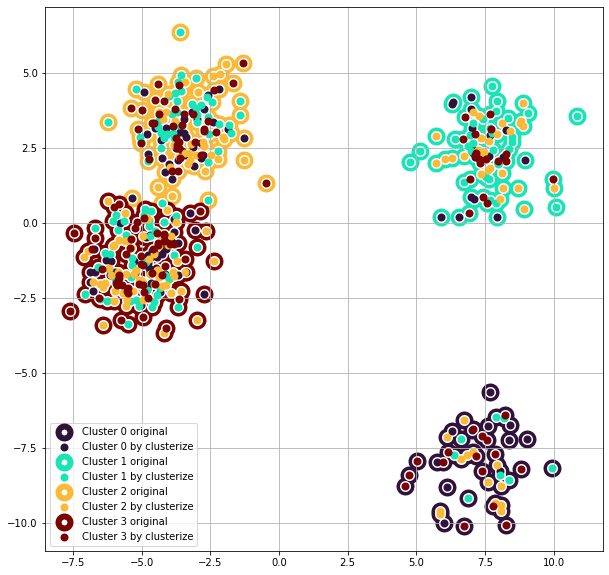

In [7]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[nc_clusters == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by clusterize')

plt.legend()
plt.grid(True)
plt.show()

In [8]:
df = pd.DataFrame({'Original' : original_clusters})
for cluster in clusters:
    df['P(cluster is ' + str(cluster) + ')'] = labels_nc[:, cluster]
df

,Original,P(cluster is 0),P(cluster is 1),P(cluster is 2),P(cluster is 3)
0,2,0.089757,0.328722,0.321842,0.259679
1,2,0.256854,0.035456,0.249796,0.457894
2,2,0.013510,0.261492,0.398165,0.326833
3,3,0.327330,0.283034,0.166803,0.222834
4,1,0.266794,0.446164,0.031778,0.255264
...,...,...,...,...,...
475,2,0.105294,0.028754,0.468290,0.397663
476,3,0.028596,0.271917,0.383790,0.315697
477,1,0.283442,0.207643,0.013987,0.494928
478,1,0.398100,0.457508,0.058611,0.085780


## Sklearn KMeans

## without weights

In [9]:
time_uw = time.time()
model = KMeans(n_clusters=4)
model.fit(objects)
predicted_clusters_uw = model.predict(objects)
time_uw = time.time() - time_uw

print('Done in {0:8.6f}'.format(time_uw))

Done in 0.053042


In [10]:
pd.DataFrame({'Original' : original_clusters, 'Predicted': predicted_clusters_uw})

,Original,Predicted
0,2,3
1,2,3
2,2,3
3,3,1
4,1,0
...,...,...
475,2,3
476,3,1
477,1,0
478,1,0


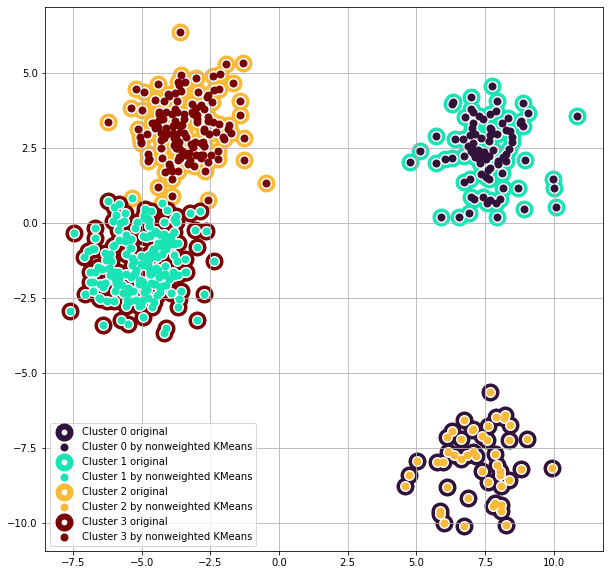

In [11]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[predicted_clusters_uw == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by nonweighted KMeans')

plt.legend()
plt.grid(True)
plt.show()

## with weights

In [12]:
time_ww = time.time()
model = KMeans(n_clusters=4)
model.fit(objects, sample_weight=weights)
predicted_clusters_ww = model.predict(objects)
time_ww = time.time() - time_ww

print('Done in {0:8.6f}'.format(time_ww))

Done in 0.024718


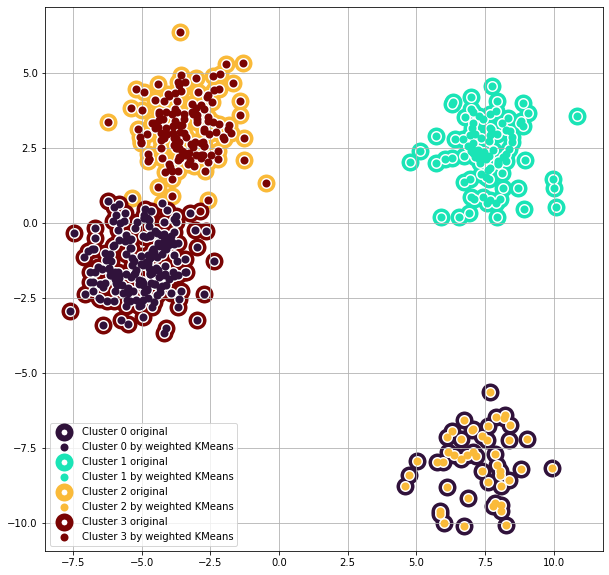

In [13]:
plt.figure(figsize=(10, 10))

for cluster in clusters:
    cluster_objects_original = objects[original_clusters == cluster]
    cluster_objects_predicted = objects[predicted_clusters_ww == cluster]
    
    x_or = cluster_objects_original[:, 0]
    y_or = cluster_objects_original[:, 1]
    x_pr = cluster_objects_predicted[:, 0]
    y_pr = cluster_objects_predicted[:, 1]
    
    col = cluster_colors[cluster]
    plt.scatter(x_or, y_or, linewidth=12, color='white', edgecolors=col, zorder=0, label='Cluster '+str(cluster)+' original')
    plt.scatter(x_or, y_or, linewidth=5, color='white', zorder=1)
    plt.scatter(x_pr, y_pr, linewidth=2, color=col, zorder=2, label='Cluster '+str(cluster)+' by weighted KMeans')

plt.legend()
plt.grid(True)
plt.show()

# Compare

In [14]:
print('NC-clusterization done in {0:6.4f} seconds.'.format(time_nc))
print('UW-clusterization done in {0:6.4f} seconds.'.format(time_uw))
print('WW-clusterization done in {0:6.4f} seconds.'.format(time_ww))

NC-clusterization done in 5.6936 seconds.
UW-clusterization done in 0.0530 seconds.
WW-clusterization done in 0.0247 seconds.


In [15]:
labels_or = compare.cluster_to_probability(original_clusters)
labels_uw = compare.cluster_to_probability(predicted_clusters_uw)
labels_ww = compare.cluster_to_probability(predicted_clusters_ww)

In [16]:
print('Compre Original and NC: {0:10.4f}'.format(compare.metric(labels_or, labels_nc)))
print('Compre Original and WW: {0:10.4f}'.format(compare.metric(labels_or, labels_ww)))
print('Compre Original and UW: {0:10.4f}'.format(compare.metric(labels_or, labels_uw)))

Compre Original and NC:   709.9458
Compre Original and WW:     8.0000
Compre Original and UW:     6.0000


In [17]:
print('Compre UW and WW: {0:10.4f}'.format(compare.metric(labels_uw, labels_ww)))
print('Compre NC and WW: {0:10.4f}'.format(compare.metric(labels_nc, labels_ww)))
print('Compre NC and UW: {0:10.4f}'.format(compare.metric(labels_nc, labels_uw)))

Compre UW and WW:     2.0000
Compre NC and WW:   709.4128
Compre NC and UW:   709.9535


__The result:__

We see, that results are not compareble and noncentroid clusterization is not so nice.

That can be two possible explanations:
1. Minimizing functions of each methods are not compareble
2. Probability matrix change alot

In [18]:
print('PSDP for NC-clusterization is {0:12.4f}'.format(PSDP(labels_nc, distances, weights)))
print('PSDP for UW-clusterization is {0:12.4f}'.format(PSDP(labels_uw, distances, weights)))
print('PSDP for WW-clusterization is {0:12.4f}'.format(PSDP(labels_ww, distances, weights)))

PSDP for NC-clusterization is  199192.2725
PSDP for UW-clusterization is  198040.3310
PSDP for WW-clusterization is  198039.2093


So PSDP is similar for all clusterizations. So problem is in probability nature.